In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline
import pydotplus
from IPython.display import Image
import collections
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import chi2_contingency
import re
import datetime as dt
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from   statsmodels.formula.api import OLS
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from  sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_excel('C:/Users/sumit/Sumit DATA/datasets/Project/Cleandata7.xlsx')

In [3]:
df.head()

ID   Salary        DOJ        DOL               Designation    JobCity  \
0  203097   420000 2012-06-01 2015-12-31   senior quality engineer  bangalore   
1  579905   500000 2013-09-01 2015-12-31         assistant manager     indore   
2  810601   325000 2014-06-01 2015-12-31          systems engineer    chennai   
3  267447  1100000 2011-07-01 2015-12-31  senior software engineer    gurgaon   
4  343523   200000 2014-03-01 2015-03-01                       get    manesar   

   Gender        DOB  10percentage      10board ...  agreeableness  \
0  Female 1990-02-19          84.3  State Board ...         0.8128   
1    Male 1989-10-04          85.4         CBSE ...         0.3789   
2  Female 1992-08-03          85.0         CBSE ...         1.7109   
3    Male 1989-12-05          85.6         CBSE ...         0.3448   
4    Male 1991-02-27          78.0         CBSE ...        -0.2793   

   extraversion nueroticism  openess_to_experience Aggregate Mean Marks  \
0        0.5269     1.35490                -0.4455                445.0   
1        1.2396    -0.10760                 0.8637                466.0   
2        0.1637    -0.86820                 0.6721                395.0   
3       -0.3440    -0.40780                -0.9194                615.0   
4       -1.0697     0.09163                -0.1295                233.0   

  Aggregate Max Marks Aggregate Min Marks  GAP_after_Grad  GAP_in_Grad Age  
0                 445                 445               1            0  25  
1                 466                 466               1            1  26  
2                 395                 395               0            0  23  
3                 615                 615               0            0  26  
4                 233                 233               2            0  24  

[5 rows x 44 columns]

In [4]:
from scipy import stats
import numpy as np
df = df[(np.abs(stats.zscore(df['Salary'])) < 3)]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3939 entries, 0 to 3978
Data columns (total 44 columns):
ID                       3939 non-null int64
Salary                   3939 non-null int64
DOJ                      3939 non-null datetime64[ns]
DOL                      3939 non-null datetime64[ns]
Designation              3939 non-null object
JobCity                  3483 non-null object
Gender                   3939 non-null object
DOB                      3939 non-null datetime64[ns]
10percentage             3939 non-null float64
10board                  3939 non-null object
12graduation             3939 non-null int64
12percentage             3939 non-null float64
12board                  3939 non-null object
CollegeID                3939 non-null int64
CollegeTier              3939 non-null object
Degree                   3939 non-null object
Specialization           3939 non-null object
collegeGPA               3939 non-null float64
CollegeCityID            3939 non-null int

In [6]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Aggregate Mean Marks', 'Aggregate Max Marks', 'Aggregate Min Marks',
       'GAP_after_Grad', 'GAP_in_Grad', 'Age'],
      dtype='object')

In [7]:
df.head().T

0  \
ID                                      203097   
Salary                                  420000   
DOJ                        2012-06-01 00:00:00   
DOL                        2015-12-31 00:00:00   
Designation            senior quality engineer   
JobCity                              bangalore   
Gender                                  Female   
DOB                        1990-02-19 00:00:00   
10percentage                              84.3   
10board                            State Board   
12graduation                              2007   
12percentage                              95.8   
12board                            State Board   
CollegeID                                 1141   
CollegeTier                    Average College   
Degree                             B.Tech/B.E.   
Specialization            computer engineering   
collegeGPA                                8.21   
CollegeCityID                             1141   
CollegeCityTier                   Good College   
CollegeState                    Andhra Pradesh   
GraduationYear                            2011   
English                                    515   
Logical                                    585   
Quant                                      525   
Domain                                0.635979   
ComputerProgramming                        445   
ElectronicsAndSemicon                      NaN   
ComputerScience                            NaN   
MechanicalEngg                             NaN   
ElectricalEngg                             NaN   
TelecomEngg                                NaN   
CivilEngg                                  NaN   
conscientiousness                       0.9737   
agreeableness                           0.8128   
extraversion                            0.5269   
nueroticism                             1.3549   
openess_to_experience                  -0.4455   
Aggregate Mean Marks                       445   
Aggregate Max Marks                        445   
Aggregate Min Marks                        445   
GAP_after_Grad                               1   
GAP_in_Grad                                  0   
Age                                         25   

                                                               1  \
ID                                                        579905   
Salary                                                    500000   
DOJ                                          2013-09-01 00:00:00   
DOL                                          2015-12-31 00:00:00   
Designation                                    assistant manager   
JobCity                                                   indore   
Gender                                                      Male   
DOB                                          1989-10-04 00:00:00   
10percentage                                                85.4   
10board                                                     CBSE   
12graduation                                                2007   
12percentage                                                  85   
12board                                                     CBSE   
CollegeID                                                   5807   
CollegeTier                                      Average College   
Degree                                               B.Tech/B.E.   
Specialization         electronics and communication engineering   
collegeGPA                                                  7.37   
CollegeCityID                                               5807   
CollegeCityTier                                     Good College   
CollegeState                                      Madhya Pradesh   
GraduationYear                                              2012   
English                                                      695   
Logical                                                      610   
Quant                                                        780   
Domain                    

In [8]:
df = df.drop(['ID', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'DOB', 'CollegeID', 'CollegeCityID', 'CollegeCityTier',
       'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg','GAP_after_Grad'],axis=1)

In [9]:
df.groupby('12graduation').count()['Salary']

12graduation
2003      24
2004      68
2005     155
2006     399
2007     521
2008     932
2009    1047
2010     738
2011      44
2012      10
2013       1
Name: Salary, dtype: int64

In [10]:
df['12graduation'].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 2004, 2012, 2003, 2013],
      dtype=int64)

In [11]:
df.head().T

0  \
Salary                               420000   
Gender                               Female   
10percentage                           84.3   
10board                         State Board   
12graduation                           2007   
12percentage                           95.8   
12board                         State Board   
CollegeTier                 Average College   
Degree                          B.Tech/B.E.   
Specialization         computer engineering   
collegeGPA                             8.21   
CollegeState                 Andhra Pradesh   
GraduationYear                         2011   
English                                 515   
Logical                                 585   
Quant                                   525   
Domain                             0.635979   
conscientiousness                    0.9737   
agreeableness                        0.8128   
extraversion                         0.5269   
nueroticism                          1.3549   
openess_to_experience               -0.4455   
Aggregate Mean Marks                    445   
Aggregate Max Marks                     445   
Aggregate Min Marks                     445   
GAP_in_Grad                               0   
Age                                      25   

                                                               1  \
Salary                                                    500000   
Gender                                                      Male   
10percentage                                                85.4   
10board                                                     CBSE   
12graduation                                                2007   
12percentage                                                  85   
12board                                                     CBSE   
CollegeTier                                      Average College   
Degree                                               B.Tech/B.E.   
Specialization         electronics and communication engineering   
collegeGPA                                                  7.37   
CollegeState                                      Madhya Pradesh   
GraduationYear                                              2012   
English                                                      695   
Logical                                                      610   
Quant                                                        780   
Domain                                                  0.960603   
conscientiousness                                        -0.7335   
agreeableness                                             0.3789   
extraversion                                              1.2396   
nueroticism                                              -0.1076   
openess_to_experience                                     0.8637   
Aggregate Mean Marks                                         466   
Aggregate Max Marks                                          466   
Aggregate Min Marks                                          466   
GAP_in_Grad                                                    1   
Age                                                           26   

                                            2  \
Salary                                 325000   
Gender                                 Female   
10percentage                               85   
10board                                  CBSE   
12graduation                             2010   
12percentage                             68.2   
12board                                  CBSE   
CollegeTier                   Average College   
Degree                            B.Tech/B.E.   
Specialization         information technology   
collegeGPA                               7.37   
CollegeState                    Uttar Pradesh   
GraduationYear                           2014   
English                                   615   
Logical                                   545   
Quant                               

In [12]:
from sklearn.preprocessing import LabelEncoder
gender_label = LabelEncoder()
df['Gender'] = gender_label.fit_transform(df['Gender'])
per10 = LabelEncoder()
df['10board'] = per10.fit_transform(df['10board'])
per12 = LabelEncoder()
df['12board'] = per12.fit_transform(df['12board'])
deg = LabelEncoder()
df['Degree'] = deg.fit_transform(df['Degree'])
sep = LabelEncoder()
df['Specialization'] = sep.fit_transform(df['Specialization'])
colgpa = LabelEncoder()
df['CollegeState'] = colgpa.fit_transform(df['CollegeState'])
wegrad = LabelEncoder()
df['12graduation'] = wegrad.fit_transform(df['12graduation'])
wegradqw = LabelEncoder()
df['GraduationYear'] = wegradqw.fit_transform(df['GraduationYear'])
qwerty = LabelEncoder()
df['CollegeTier'] = qwerty.fit_transform(df['CollegeTier'])

# Modelling

In [13]:
df.T

0              1              2     \
Salary                 420000.000000  500000.000000  325000.000000   
Gender                      0.000000       1.000000       0.000000   
10percentage               84.300000      85.400000      85.000000   
10board                     2.000000       0.000000       0.000000   
12graduation                4.000000       4.000000       7.000000   
12percentage               95.800000      85.000000      68.200000   
12board                     2.000000       0.000000       0.000000   
CollegeTier                 0.000000       0.000000       0.000000   
Degree                      0.000000       0.000000       0.000000   
Specialization             10.000000      21.000000      33.000000   
collegeGPA                  8.210000       7.370000       7.370000   
CollegeState                0.000000      13.000000      23.000000   
GraduationYear              3.000000       4.000000       6.000000   
English                   515.000000     695.000000     615.000000   
Logical                   585.000000     610.000000     545.000000   
Quant                     525.000000     780.000000     370.000000   
Domain                      0.635979       0.960603       0.450877   
conscientiousness           0.973700      -0.733500       0.271800   
agreeableness               0.812800       0.378900       1.710900   
extraversion                0.526900       1.239600       0.163700   
nueroticism                 1.354900      -0.107600      -0.868200   
openess_to_experience      -0.445500       0.863700       0.672100   
Aggregate Mean Marks      445.000000     466.000000     395.000000   
Aggregate Max Marks       445.000000     466.000000     395.000000   
Aggregate Min Marks       445.000000     466.000000     395.000000   
GAP_in_Grad                 0.000000       1.000000       0.000000   
Age                        25.000000      26.000000      23.000000   

                                4            5              6     \
Salary                 200000.000000  300000.0000  300000.000000   
Gender                      1.000000       1.0000       1.000000   
10percentage               78.000000      89.9200      86.080000   
10board                     0.000000       2.0000       2.000000   
12graduation                5.000000       7.0000       7.000000   
12percentage               76.800000      87.0000      67.500000   
12board                     0.000000       2.0000       2.000000   
CollegeTier                 0.000000       0.0000       0.000000   
Degree                      0.000000       0.0000       0.000000   
Specialization             21.000000      21.0000      13.000000   
collegeGPA                  7.780000       8.0300       7.680000   
CollegeState               23.000000      11.0000      11.000000   
GraduationYear              4.000000       6.0000       6.000000   
English                   545.000000     560.0000     590.000000   
Logical                   625.000000     555.0000     435.000000   
Quant                     465.000000     620.0000     380.000000   
Domain                      0.124502       0.0000       0.356536   
conscientiousness          -0.881000      -0.3027       1.708100   
agreeableness              -0.279300      -0.6201      -0.105400   
extraversion               -1.069700      -2.2954      -1.037900   
nueroticism                 0.091630      -0.7415      -2.009200   
openess_to_experience      -0.129500      -0.8608      -1.087200   
Aggregate Mean Marks      233.000000     526.0000     375.500000   
Aggregate Max Marks       233.000000     645.0000     405.000000   
Aggregate Min Marks       233.000000     407.0000     346.000000   
GAP_in_Grad                 0.000000       0.0000       0.000000   
Age                        24.000000      23.0000      22.000000   

                                7              8              9     \
Salary                 400000.000000  600000.000000  230000.000000   
Gender                    

In [14]:
x = df.drop('Salary',axis=1)
y = df['Salary']

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

[0.         0.10267045 0.00150682 0.00947726 0.04677223 0.00097776
 0.00873166 0.00244787 0.00664489 0.05100922 0.00299136 0.17400164
 0.05543126 0.02957169 0.3170697  0.00911593 0.01229273 0.00969817
 0.00419392 0.00495377 0.00743705 0.07158271 0.04077769 0.02237332
 0.0011278  0.00714312]


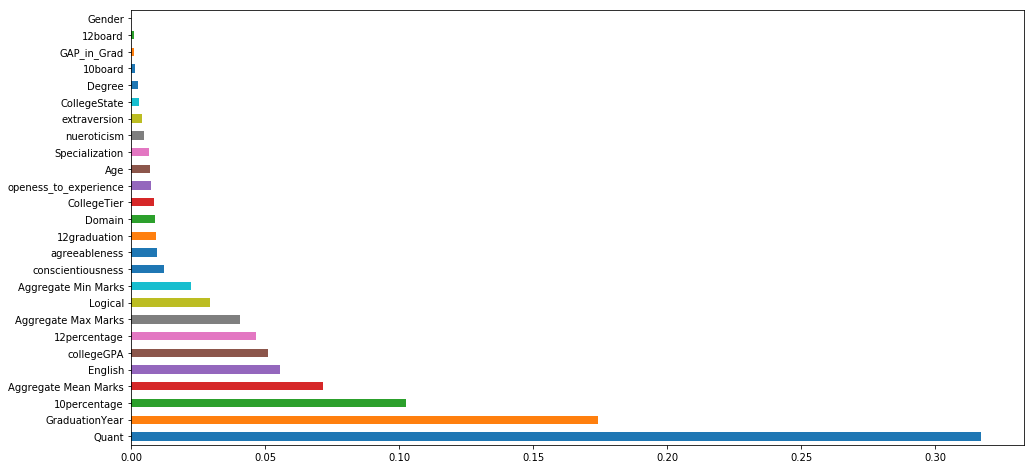

In [16]:
model = RandomForestRegressor(max_depth=5,random_state=0)
model.fit(x_train,y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(16,8))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [17]:
model.score(x_train,y_train)

0.3811286344639262

In [18]:
model.score(x_test,y_test)

0.24430328172651883

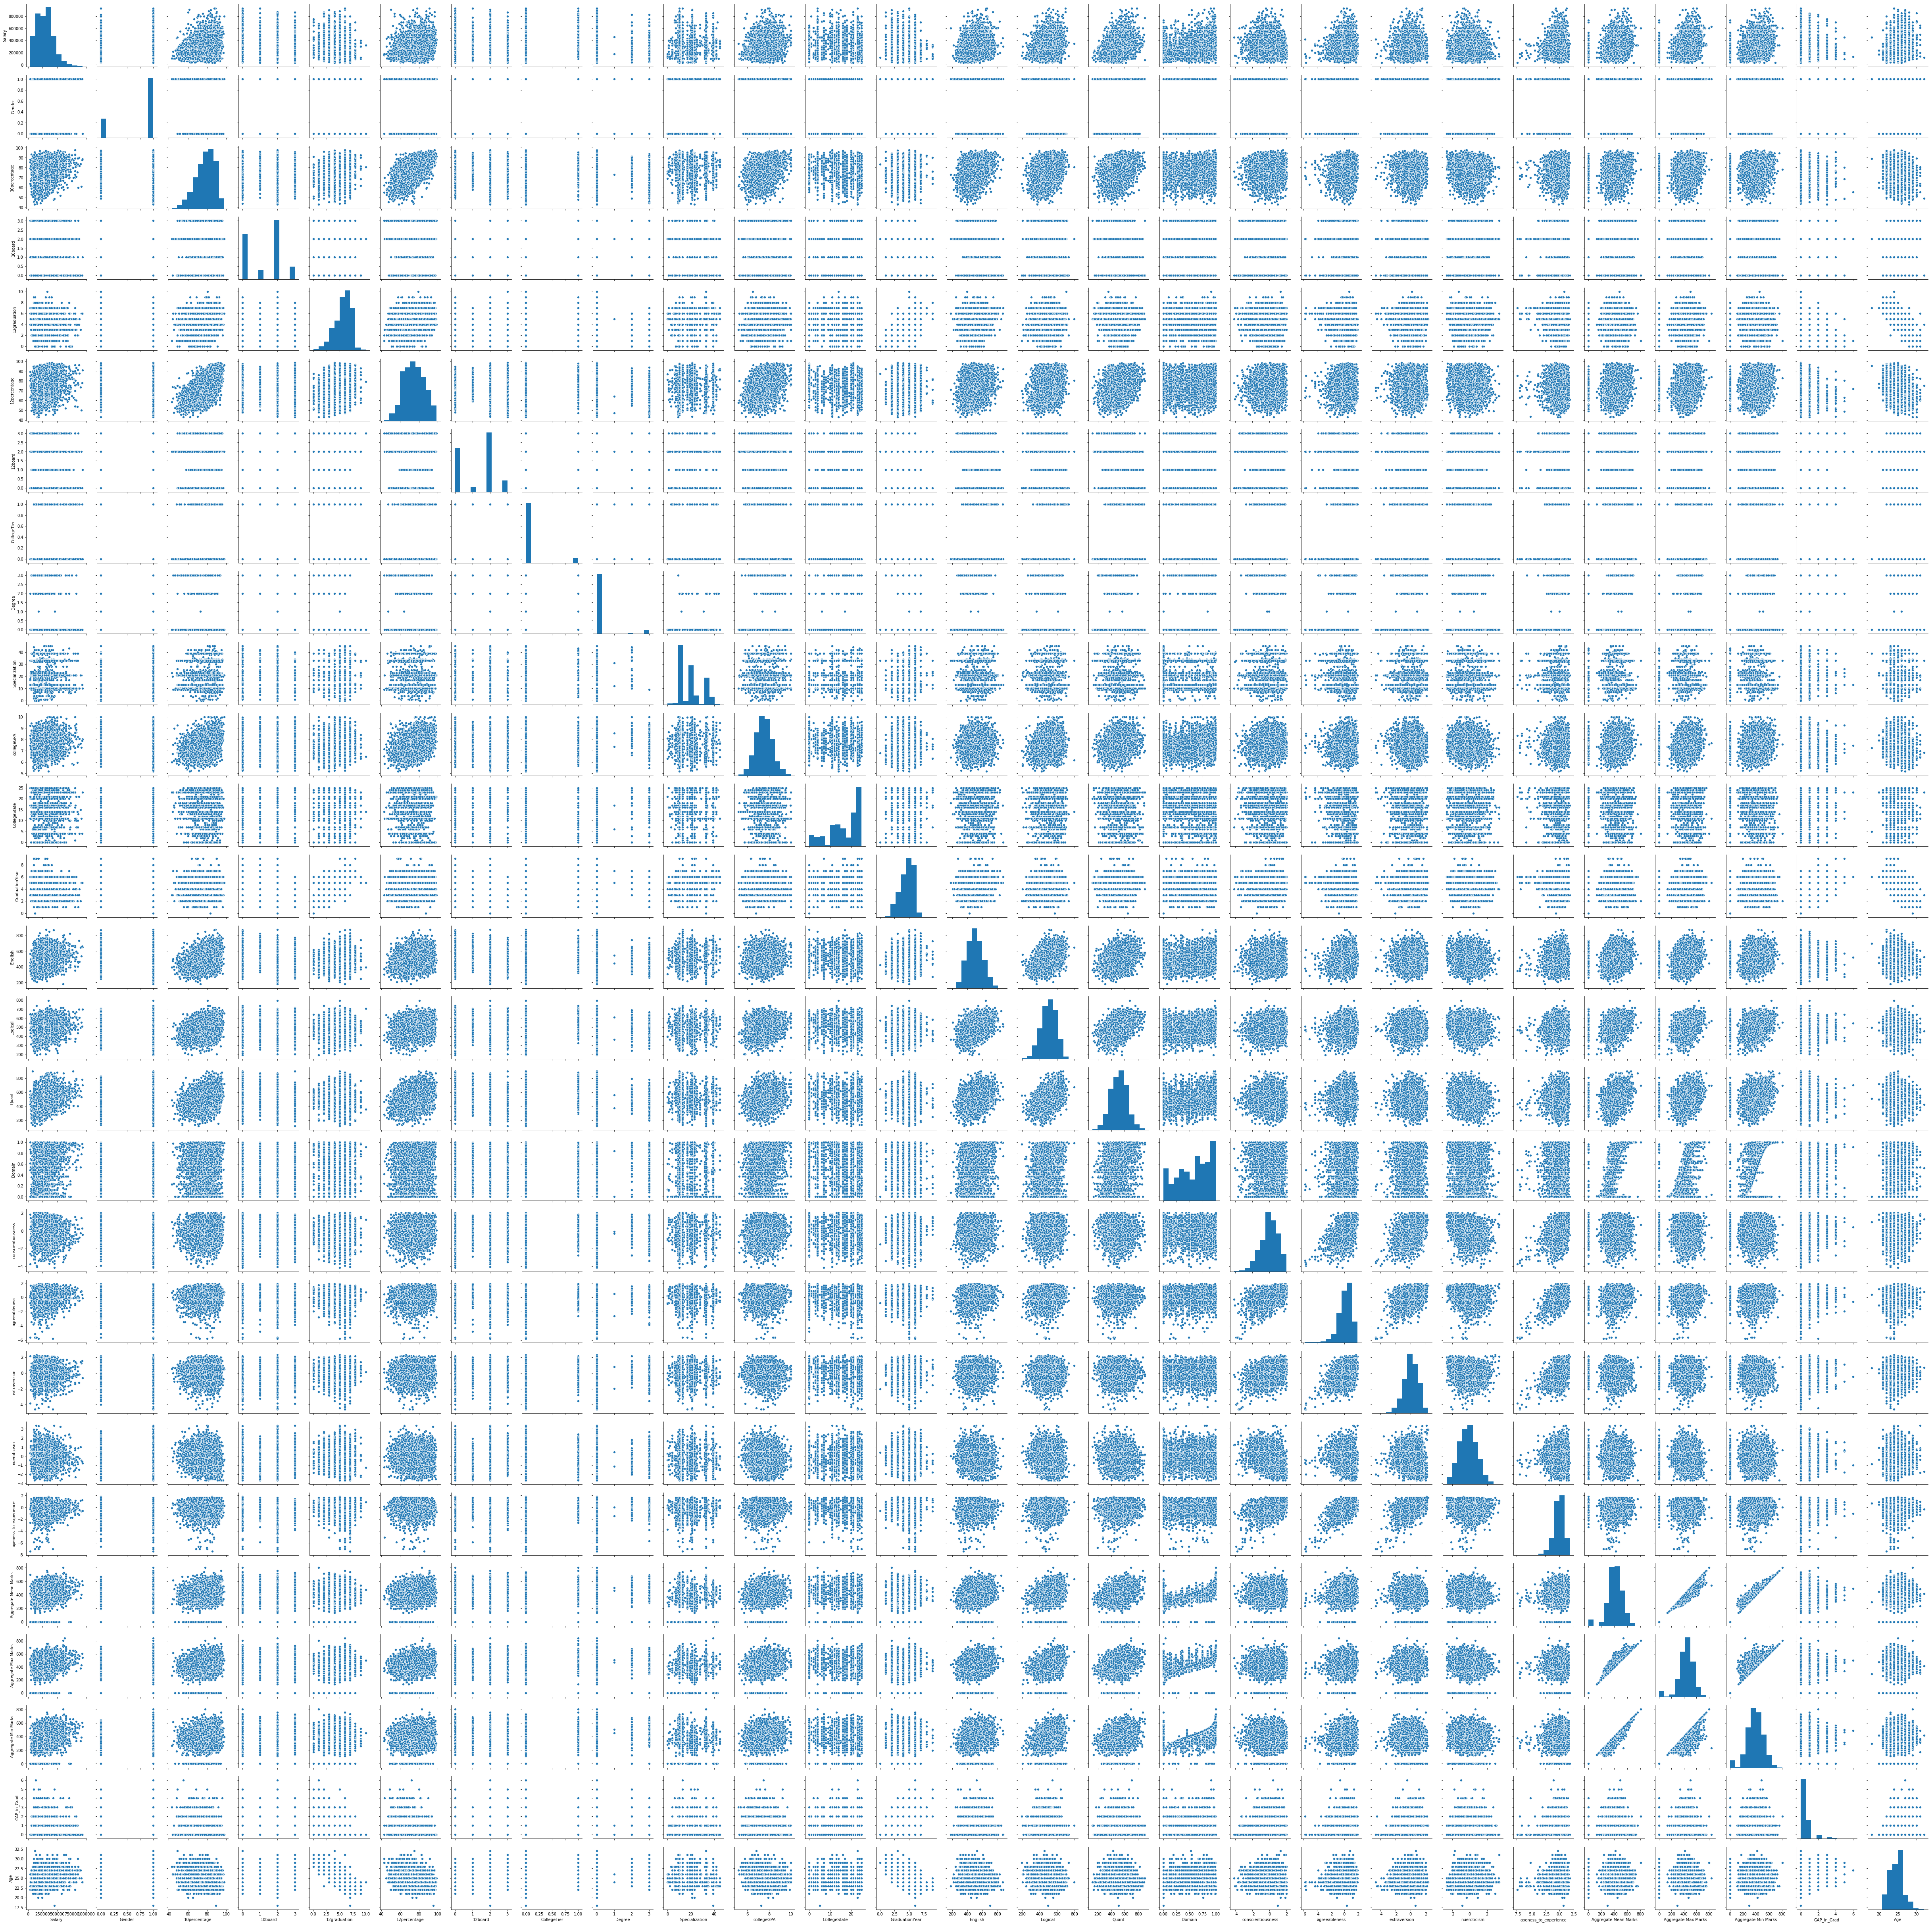

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
df.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'Aggregate Max Marks', 'Aggregate Min Marks', 'GAP_in_Grad', 'Age'],
      dtype='object')

In [21]:
from statsmodels.formula.api import OLS
x = df[['10percentage','12percentage','English', 'Logical', 'Quant',
       'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks', 'Age', 'collegeGPA',
       'GAP_in_Grad']]
y = df[['Salary']]
result = OLS(y,x)
model = result.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1461.
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:23:11   Log-Likelihood:                -51874.
No. Observations:                3939   AIC:                         1.038e+05
Df Residuals:                    3924   BIC:                         1.039e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
10percentage            389.0338    281.920      1.380      0.168    -163.689     941.757
12percentage            823.1348    254.802      3.230      0.001     323.578    1322.692
English                  95.1065     22.696      4.190      0.000      50.609     139.604
Logical                 -55.5858     29.028     -1.915      0.056    -112.496       1.325
Quant                   248.8923     20.668     12.043      0.000     208.372     289.413
Domain                 3.895e+04   9832.136      3.962      0.000    1.97e+04    5.82e+04
conscientiousness     -1.291e+04   2431.831     -5.310      0.000   -1.77e+04   -8144.787
agreeableness          9741.0171   2986.402      3.262      0.001    3885.970    1.56e+04
extraversion          -1937.5561   2494.895     -0.777      0.437   -6828.970    2953.857
nueroticism           -3792.9601   2187.893     -1.734      0.083   -8082.475     496.555
openess_to_experience -2032.7886   2601.577     -0.781      0.435   -7133.359    3067.782
Aggregate Mean Marks     41.2583     25.106      1.643      0.100      -7.963      90.480
Age                    1196.3686    745.253      1.605      0.109    -264.752    2657.489
collegeGPA            -1761.2052   2748.626     -0.641      0.522   -7150.076    3627.665
GAP_in_Grad           -4188.1865   3133.964     -1.336      0.182   -1.03e+04    1956.165
==============================================================================
Omnibus:                      502.704   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              834.671
Skew:                           0.869   Prob(JB):                    5.67e-182
Kurtosis:                       4.437   Cond. No.                     4.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
df.columns

Index(['Salary', 'Gender', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Aggregate Mean Marks',
       'Aggregate Max Marks', 'Aggregate Min Marks', 'GAP_in_Grad', 'Age'],
      dtype='object')

In [23]:
anova_dataf = df
anova_model = ols("Salary~Gender+anova_dataf['10board']+anova_dataf['12graduation']+anova_dataf['12board']+CollegeTier+Degree+Specialization+CollegeState+GraduationYear",data = anova_dataf).fit()
table = sm.stats.anova_lm(anova_model)
table

df        sum_sq       mean_sq           F  \
Gender                          1.0  1.084150e+11  1.084150e+11    6.349087   
anova_dataf['10board']          1.0  6.683139e+10  6.683139e+10    3.913832   
anova_dataf['12graduation']     1.0  2.965026e+12  2.965026e+12  173.640185   
anova_dataf['12board']          1.0  4.070496e+10  4.070496e+10    2.383796   
CollegeTier                     1.0  3.054181e+12  3.054181e+12  178.861362   
Degree                          1.0  1.195655e+12  1.195655e+12   70.020870   
Specialization                  1.0  4.259632e+10  4.259632e+10    2.494559   
CollegeState                    1.0  3.949674e+11  3.949674e+11   23.130394   
GraduationYear                  1.0  2.085134e+12  2.085134e+12  122.111269   
Residual                     3929.0  6.709039e+13  1.707569e+10         NaN   

                                   PR(>F)  
Gender                       1.178351e-02  
anova_dataf['10board']       4.796001e-02  
anova_dataf['12graduation']  7.815403e-39  
anova_dataf['12board']       1.226799e-01  
CollegeTier                  6.335441e-40  
Degree                       8.057530e-17  
Specialization               1.143209e-01  
CollegeState                 1.570530e-06  
GraduationYear               5.614109e-28  
Residual                              NaN

In [24]:
x = df[['12graduation','12percentage', 'CollegeTier', 'Degree', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness']]
y = df[['Salary']]
x = pd.DataFrame(sc.fit_transform(x))

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
print(model1.score(x_train,y_train),model1.score(x_test,y_test))

0.26686641314145254 0.28541050501936993


In [27]:
r2_score(y_test,y_pred)

0.28541050501936993

In [35]:
x = df[['12graduation','12percentage', 'CollegeTier', 'Degree', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness']]
y = df[['Salary']]
x = pd.DataFrame(sc.fit_transform(x))
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=20,criterion='mse',random_state=0)
model3 = Ridge(alpha=0.037, normalize=True)
model4 = Lasso(alpha=12,normalize=True)
rock = []
model_names = []
kf=KFold(n_splits=3,shuffle=True,random_state=0)
for model,name in zip([model1,model2,model3,model4],['Linear Regression','Random Forest','Ridge Model','Lasso Model']):
    all_rmse =[] 
    for train,test in kf.split(x,y):
        x_train,x_test=x.iloc[train,:],x.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        rmse = r2_score(y_test,y_pred)
        all_rmse.append(rmse)
        rock.append(rmse)
    model_names.append(name)
    print('R2 scores for [%s] : %.06f'% (name,np.mean(all_rmse)*100))

R2 scores for [Linear Regression] : 26.464798
R2 scores for [Random Forest] : 20.083334
R2 scores for [Ridge Model] : 26.494442
R2 scores for [Lasso Model] : 26.485511


### Ridge hyper parameter tuning

In [ ]:
x = df[['12graduation','12percentage', 'CollegeTier', 'Degree', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness']]
y = df[['Salary']]
x = pd.DataFrame(sc.fit_transform(x))
variance_error = []
bias_error = []
j = 0.001
for i in range(1,100):
    model1 = Ridge(alpha=j, normalize=True)
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    for model,name in zip([model1],['testing']):
        all_rmse=[] 
        for train,test in kf.split(x,y):
            x_train,x_test=x.iloc[train,:],x.iloc[test,:]
            y_train,y_test=y.iloc[train],y.iloc[test]
            model.fit(x_train,y_train)
            y_pred=model.predict(x_test)
            rmse = np.sqrt(mean_squared_error(y_test,y_pred))
            all_rmse.append(rmse)
            rock.append(rmse)
        model_names.append(name)
        bias_error.append(np.mean(all_rmse)),variance_error.append(np.var(all_rmse,ddof=1))
        print('RMSE scores at %0.03f : %.06f (+/- %.06f) [%s]'% (j,np.mean(all_rmse),np.var(all_rmse,ddof=1),name))
        j = j + 0.001

In [ ]:
graph = pd.DataFrame({'x':np.arange(0.001,0.1,0.001),'original_variance': variance_error,'original_bias':bias_error})

In [ ]:
sc=StandardScaler()
graph['variance_error'] = pd.DataFrame(sc.fit_transform(graph[['original_variance']]))
graph['bias_error'] = pd.DataFrame(sc.fit_transform(graph[['original_bias']]))

In [ ]:
ax = plt.gca()
graph.plot(kind='line',x='x',y='variance_error',ax=ax,figsize=(16,8),grid=True)
graph.plot(kind='line',x='x',y='bias_error', color='red', ax=ax,figsize=(16,8),grid=True)
plt.title('Graph between bias error and variance error')
plt.xticks(np.arange(-0.01, 0.1,0.001))
plt.xticks(rotation = 90)
#plt.yticks(np.arange(-5,5,0.2))
plt.show()

In [ ]:
graph

### Lasso hyper parameter tuning

In [ ]:
x = df[['12graduation','12percentage', 'CollegeTier', 'Degree', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness']]
y = df[['Salary']]
x = pd.DataFrame(sc.fit_transform(x))
variance_error = []
bias_error = []
j = 0
for i in range(1,100):
    model1 = Lasso(alpha=j,normalize=True)
    kf=KFold(n_splits=3,shuffle=True,random_state=0)
    for model,name in zip([model1],['testing']):
        all_rmse=[] 
        for train,test in kf.split(x,y):
            x_train,x_test=x.iloc[train,:],x.iloc[test,:]
            y_train,y_test=y.iloc[train],y.iloc[test]
            model.fit(x_train,y_train)
            y_pred=model.predict(x_test)
            rmse = np.sqrt(mean_squared_error(y_test,y_pred))
            all_rmse.append(rmse)
            rock.append(rmse)
        model_names.append(name)
        bias_error.append(np.mean(all_rmse)),variance_error.append(np.var(all_rmse,ddof=1))
        print('RMSE scores at %0.03f : %.06f (+/- %.06f) [%s]'% (j,np.mean(all_rmse),np.var(all_rmse,ddof=1),name))
        j = j + 0.5

In [ ]:
graph = pd.DataFrame({'x':np.arange(0,j,0.5),'original_variance': variance_error,'original_bias':bias_error})
sc=StandardScaler()
graph['variance_error'] = pd.DataFrame(sc.fit_transform(graph[['original_variance']]))
graph['bias_error'] = pd.DataFrame(sc.fit_transform(graph[['original_bias']]))
ax = plt.gca()
graph.plot(kind='line',x='x',y='variance_error',ax=ax,figsize=(16,8),grid=True)
graph.plot(kind='line',x='x',y='bias_error', color='red', ax=ax,figsize=(16,8),grid=True)
plt.title('Graph between bias error and variance error')
plt.xticks(np.arange(0,50))
plt.xticks(rotation = 90)
#plt.yticks(np.arange(-5,5,0.2))
plt.show()
graph

In [ ]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
print(f'{xgb.score(x_train,y_train)} , {xgb.score(x_test,y_test)}')